In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
store = pd.read_csv('SampleSuperstore.csv');store.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [ ]:
# store['Profit'] = store['Profit'].apply(lambda x: 'P' if x > 0 else 'L')
store['Profit'] = store['Profit'] > 0

In [ ]:
store['Profit'] = store['Profit'].replace({True: 'P', False: 'L'})

In [ ]:
store.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,P
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,P
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,P
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,L
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,P


In [ ]:
store.columns

Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount',
       'Profit'],
      dtype='object')

In [ ]:
store.dtypes

Ship Mode        object
Segment          object
Country          object
City             object
State            object
Postal Code       int64
Region           object
Category         object
Sub-Category     object
Sales           float64
Quantity          int64
Discount        float64
Profit           object
dtype: object

In [ ]:
store.shape

(9994, 13)

In [ ]:
store.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

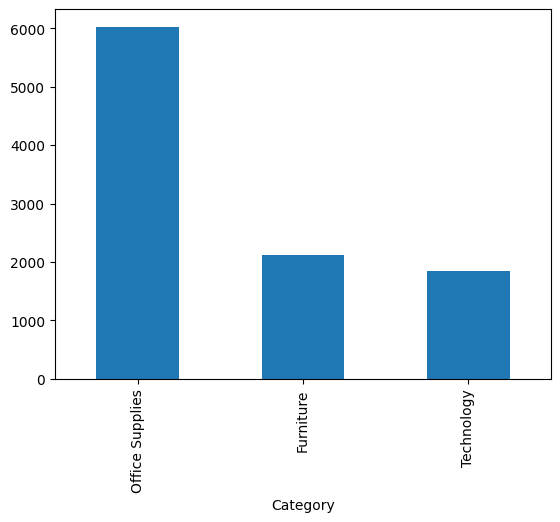

In [ ]:
store['Category'].value_counts().plot.bar();

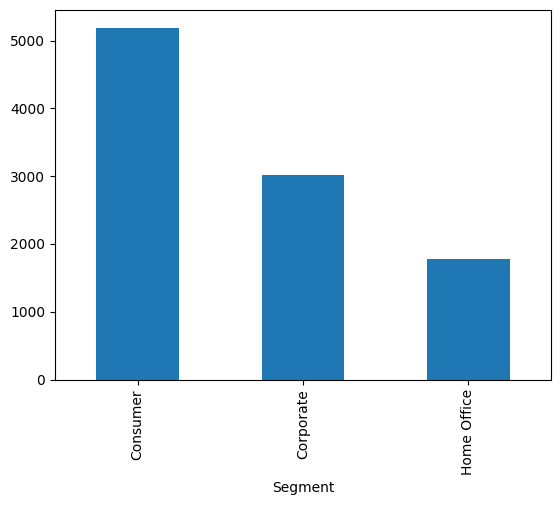

In [ ]:
store['Segment'].value_counts().plot.bar();

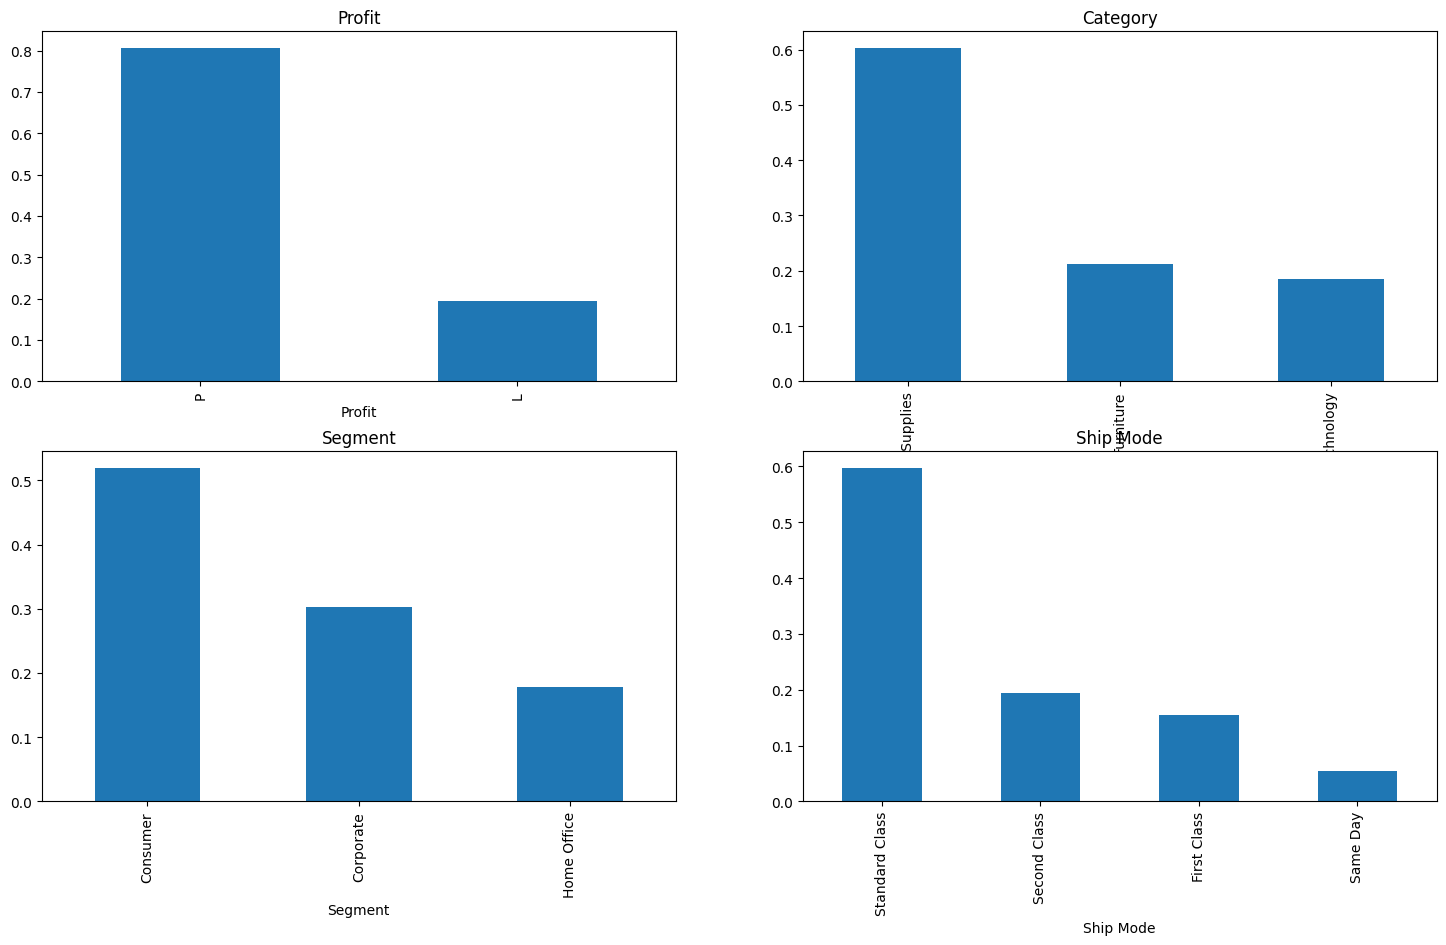

In [ ]:
plt.figure(1)
plt.subplot(221)
store['Profit'].value_counts(normalize=True).plot.bar(figsize=(18,10), title= 'Profit')

plt.subplot(222)
store['Category'].value_counts(normalize=True).plot.bar(title= 'Category')

plt.subplot(223)
store['Segment'].value_counts(normalize=True).plot.bar(title= 'Segment')

plt.subplot(224)
store['Ship Mode'].value_counts(normalize=True).plot.bar(title= 'Ship Mode')

plt.show()

It can be inferred from the above bar plots that :-

* 80% applicants in the dataset from profit.

* Around 65% of the dataset in supplies.

* Around 51% applicants in the dataset from consumer.

* Around 60% in standard class.

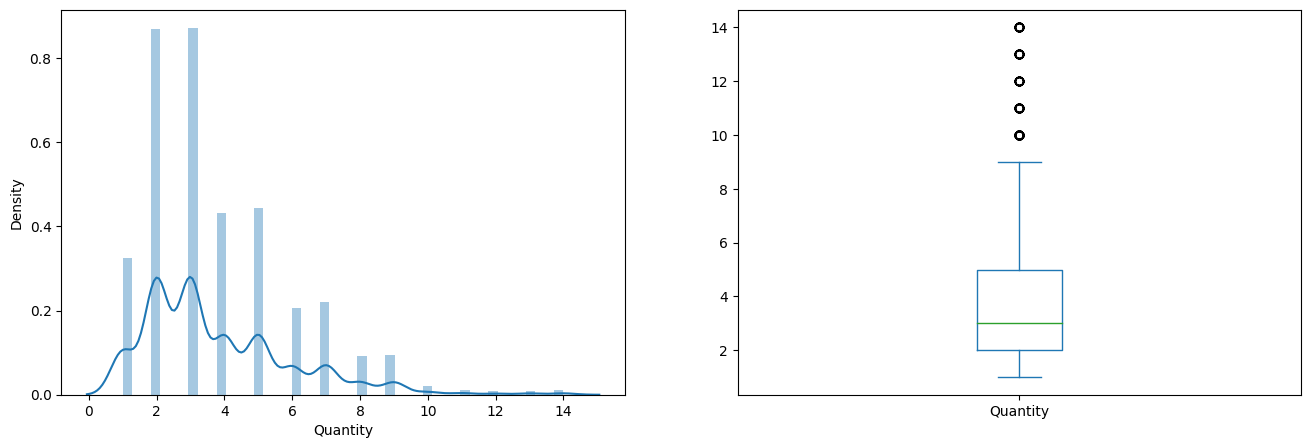

In [ ]:
import warnings
warnings.filterwarnings("ignore")
plt.figure(1)
plt.subplot(121)
sns.distplot(store['Quantity']);
plt.subplot(122)
store['Quantity'].plot.box(figsize=(16,5));
plt.show();

* displays a histogram with a kernel density estimate, while boxplot shows quartiles, outliers, and median

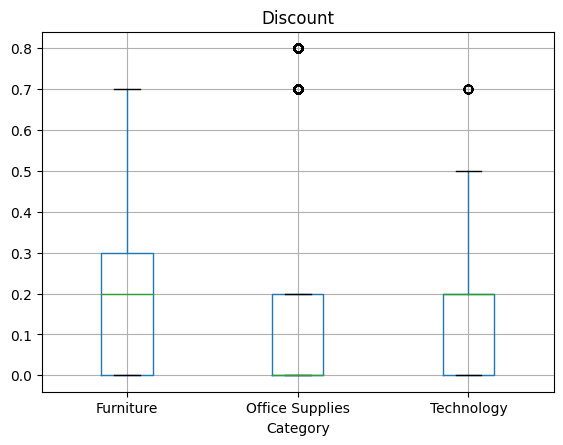

In [ ]:
store.boxplot(column='Discount', by = 'Category')
plt.suptitle("");

* We can see that there are a higher number of office supplies discount by 70% to 80%

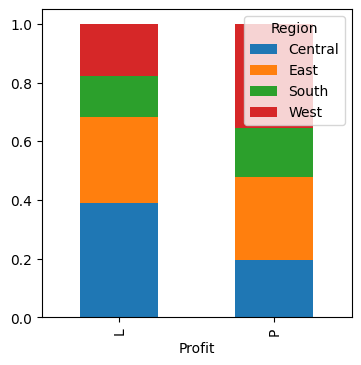

In [ ]:
Gender=pd.crosstab(store['Profit'],store['Region'])
Gender.div(Gender.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4));

* It can be inferred that the proportion of Profit and Loss by region

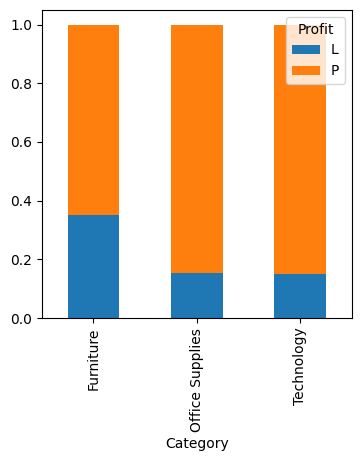

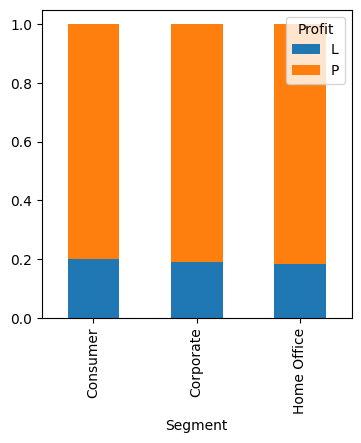

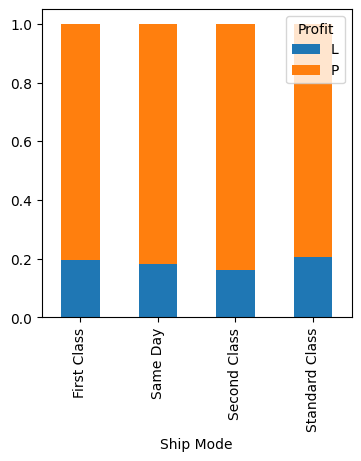

In [ ]:
Category=pd.crosstab(store['Category'],store['Profit'])
Segment=pd.crosstab(store['Segment'],store['Profit'])
Ship_Mode=pd.crosstab(store['Ship Mode'],store['Profit'])

Category.div(Category.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))
plt.show()
Segment.div(Segment.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))
plt.show()
Ship_Mode.div(Ship_Mode.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))
plt.show()

* Proportion of Category applicants is higher for the Technology profit.
* Proportion of Segment applicants is equal profit.
* Proportion of Ship Mode second class is best.

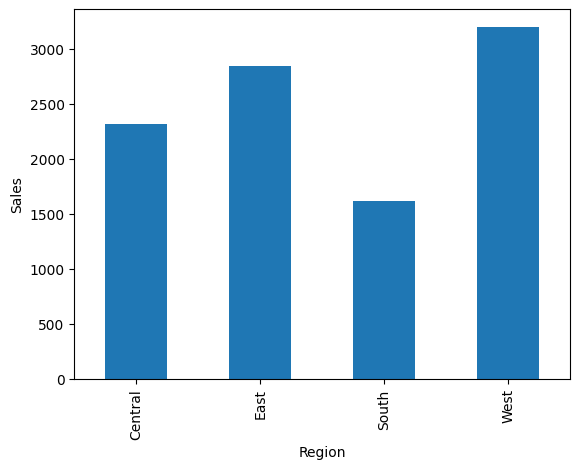

In [ ]:
store.groupby('Region')['Sales'].count().plot.bar()
P = plt.ylabel('Sales');

* West region is the best sales product.

In [ ]:
a = pd.DataFrame(store.Sales, columns = ['Sales'])
b = pd.DataFrame(store.Quantity, columns = ['Quantity'])
c = pd.DataFrame(store.Discount, columns = ['Discount'])
d = pd.concat([a,b,c], axis = 1)
d.head()

,Sales,Quantity,Discount
0,261.9600,2,0.00
1,731.9400,3,0.00
2,14.6200,2,0.00
3,957.5775,5,0.45
4,22.3680,2,0.20


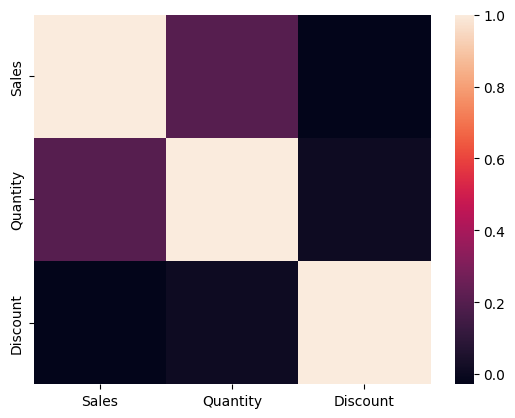

In [ ]:
sns.heatmap(d.corr());

* We see that the most correlated variables are (Quantity - Sales - Discount).

In [ ]:
store.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [ ]:
x = store.drop(columns = ['Profit'])
y = store['Profit']

In [ ]:
from sklearn.preprocessing import LabelEncoder

X = x.copy()
for col in x.columns:
    lb = LabelEncoder()
    X[col] = lb.fit_transform(x[col])

X.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount
0,2,0,0,194,15,217,2,0,4,4205,1,0
1,2,0,0,194,15,217,2,0,5,5219,2,0
2,2,1,0,266,3,517,3,1,10,969,1,0
3,3,0,0,153,8,170,2,0,16,5392,4,7
4,3,0,0,153,8,170,2,1,14,1360,1,3


In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X,y, test_size =0.3)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

model = LogisticRegression()
model.fit(x_train, y_train)
model.score(x_train, y_train), model.score(x_test, y_test)

(0.921229449606862, 0.920973657885962)

In [ ]:
pred_cv = model.predict(x_test)
accuracy_score(y_test,pred_cv)

0.920973657885962

In [ ]:
from sklearn.model_selection import StratifiedKFold

In [ ]:
a = 0
i=1
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True)
for train_index,test_index in kf.split(X,y):
    print('\n{} of kfold {}'.format(i,kf.n_splits))
    xtr,xvl = X.loc[train_index],X.loc[test_index]
    ytr,yvl = y[train_index],y[test_index]
    model = LogisticRegression(random_state=1)
    model.fit(xtr, ytr)
    pred_test = model.predict(xvl)
    score = accuracy_score(yvl,pred_test)
    print('accuracy_score',score)
    i+=1
    a = a + score

pred_test = model.predict(x_test)
pred=model.predict_proba(xvl)[:,1]

print()
print('Avg. Score:-  ',a/5)


1 of kfold 5
accuracy_score 0.9194597298649325

2 of kfold 5
accuracy_score 0.9219609804902451

3 of kfold 5
accuracy_score 0.9129564782391195

4 of kfold 5
accuracy_score 0.9229614807403702

5 of kfold 5
accuracy_score 0.9144144144144144

Avg. Score:-   0.9183506167498164


In [ ]:
yvl

12      P
19      P
21      P
25      P
28      L
       ..
9976    P
9979    P
9981    P
9986    P
9989    P
Name: Profit, Length: 1998, dtype: object

In [ ]:
pred

array([0.86800236, 0.92662721, 0.99667063, ..., 0.83921504, 0.98755258,
       0.64566045])

In [ ]:
s = yvl.replace({'P': 1, 'L': 0})

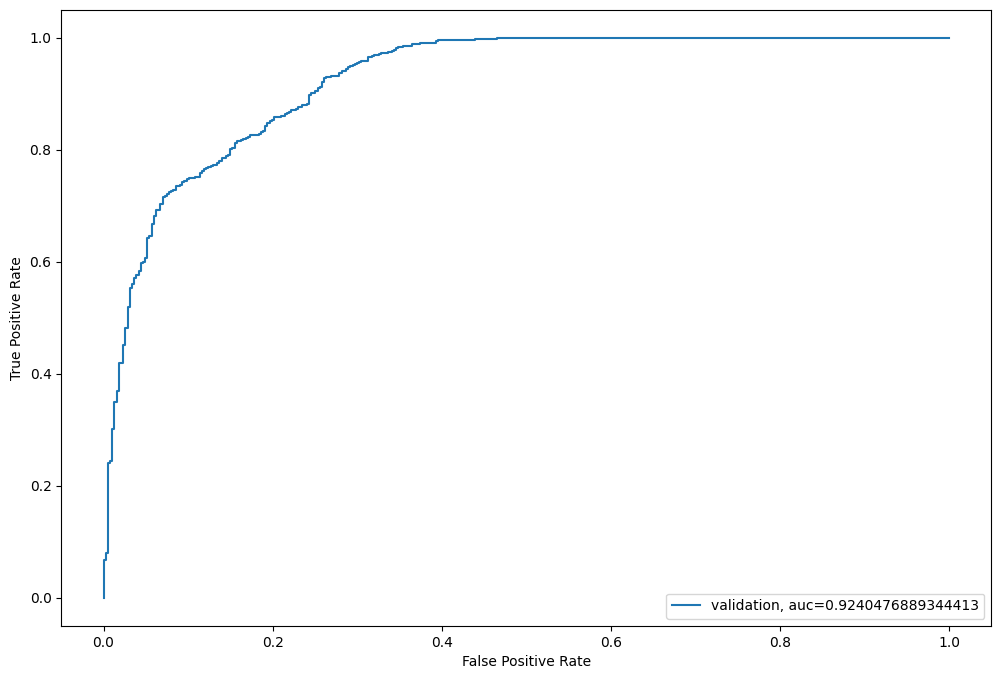

In [ ]:
from sklearn import metrics

fpr, tpr, _ = metrics.roc_curve(s,  pred)
auc = metrics.roc_auc_score(yvl, pred)

plt.figure(figsize=(12,8))
plt.plot(fpr,tpr,label="validation, auc="+str(auc))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4)
plt.show()

In [ ]:
X['Total_income'] = X['Sales'] * X['Quantity']

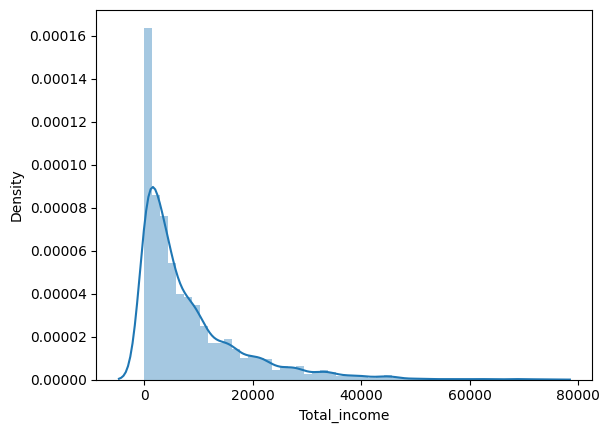

In [ ]:
sns.distplot(X['Total_income']);

In [ ]:
X.loc[X['Total_income']<= 0,'Total_income']

52      0
61      0
70      0
74      0
79      0
       ..
9964    0
9965    0
9980    0
9986    0
9987    0
Name: Total_income, Length: 899, dtype: int64

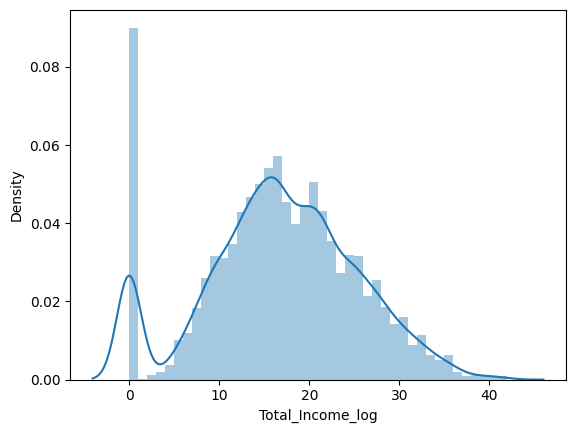

In [ ]:
X['Total_Income_log'] = np.cbrt(X['Total_income'])
sns.distplot(X['Total_Income_log']);

In [ ]:
X = X.drop(['Total_income','Total_Income_log'], axis=1)

In [ ]:
c = 0
i=1
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True)
for train_index,test_index in kf.split(X,y):
    print('\n{} of kfold {}'.format(i,kf.n_splits))
    xtr,xvl = X.loc[train_index],X.loc[test_index]
    ytr,yvl = y[train_index],y[test_index]

    model = LogisticRegression(random_state=1)
    model.fit(xtr, ytr)
    pred_test = model.predict(xvl)
    score = accuracy_score(yvl,pred_test)
    print('accuracy_score',score)
    i+=1
    c = c + score

pred_test = model.predict(x_test)
pred=model.predict_proba(xvl)[:,1]

print()
print('Avg. Score:- ',c/5)


1 of kfold 5
accuracy_score 0.9194597298649325

2 of kfold 5
accuracy_score 0.9219609804902451

3 of kfold 5
accuracy_score 0.9129564782391195

4 of kfold 5
accuracy_score 0.9229614807403702

5 of kfold 5
accuracy_score 0.9144144144144144

Avg. Score:-  0.9183506167498164


In [ ]:
from sklearn import tree

In [ ]:
d = 0
i=1
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True)
for train_index,test_index in kf.split(X,y):
    print('\n{} of kfold {}'.format(i,kf.n_splits))
    xtr,xvl = X.loc[train_index],X.loc[test_index]
    ytr,yvl = y[train_index],y[test_index]
    model = tree.DecisionTreeClassifier(random_state=1)
    model.fit(xtr, ytr)
    pred_test = model.predict(xvl)
    score = accuracy_score(yvl,pred_test)
    print('accuracy_score',score)
    i+=1
    d = d + score

pred_test = model.predict(x_test)

print()
print('Avg. Score:- ',d/5)


1 of kfold 5
accuracy_score 0.9289644822411206

2 of kfold 5
accuracy_score 0.9254627313656828

3 of kfold 5
accuracy_score 0.9259629814907454

4 of kfold 5
accuracy_score 0.9339669834917459

5 of kfold 5
accuracy_score 0.9229229229229229

Avg. Score:-  0.9274560203024436


In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
e = 0
i=1
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True)
for train_index,test_index in kf.split(X,y):
    print('\n{} of kfold {}'.format(i,kf.n_splits))
    xtr,xvl = X.loc[train_index],X.loc[test_index]
    ytr,yvl = y[train_index],y[test_index]
    model = RandomForestClassifier(random_state=1, max_depth=10)
    model.fit(xtr, ytr)
    pred_test = model.predict(xvl)
    score = accuracy_score(yvl,pred_test)
    print('accuracy_score',score)
    i+=1
    e = e + score

pred_test = model.predict(x_test)

print()
print('Avg. Score:- ',e/5)


1 of kfold 5
accuracy_score 0.9449724862431216

2 of kfold 5
accuracy_score 0.9404702351175588

3 of kfold 5
accuracy_score 0.9424712356178089

4 of kfold 5
accuracy_score 0.9484742371185593

5 of kfold 5
accuracy_score 0.9424424424424425

Avg. Score:-  0.9437661273078982


*  We will use grid search to get the optimized values of hyper parameters. Grid-search is a way to select the best of a family of hyper parameters, parametrized by a grid of parameters.

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
paramgrid = {'max_depth': list(range(1, 20, 2)), 'n_estimators': list(range(1, 200, 20))}

In [ ]:
grid_search=GridSearchCV(RandomForestClassifier(random_state=1),paramgrid)

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_cv, y_train, y_cv = train_test_split(X,y, test_size =0.3, random_state=1)

In [ ]:
grid_search.fit(x_train,y_train)

GridSearchCV(estimator=RandomForestClassifier(random_state=1),
             param_grid={'max_depth': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19],
                         'n_estimators': [1, 21, 41, 61, 81, 101, 121, 141, 161,
                                          181]})

In [ ]:
grid_search.best_estimator_

RandomForestClassifier(max_depth=11, n_estimators=41, random_state=1)

In [ ]:
f = 0
i=1
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True)
for train_index,test_index in kf.split(X,y):
    print('\n{} of kfold {}'.format(i,kf.n_splits))
    xtr,xvl = X.loc[train_index],X.loc[test_index]
    ytr,yvl = y[train_index],y[test_index]
    model = RandomForestClassifier(random_state=1, max_depth=3, n_estimators=41)
    model.fit(xtr, ytr)
    pred_test = model.predict(xvl)
    score = accuracy_score(yvl,pred_test)
    print('accuracy_score',score)
    i+=1
    f= f + score

pred_test = model.predict(x_test)
pred2=model.predict_proba(x_test)[:,1]

print()
print('Avg. Score:- ',f/5)


1 of kfold 5
accuracy_score 0.9404702351175588

2 of kfold 5
accuracy_score 0.9394697348674337

3 of kfold 5
accuracy_score 0.9389694847423712

4 of kfold 5
accuracy_score 0.9414707353676839

5 of kfold 5
accuracy_score 0.9364364364364365

Avg. Score:-  0.939363325306297


In [ ]:
from xgboost import XGBClassifier

In [ ]:
y = y.replace({'P': 1, 'L': 0})

In [ ]:
g = 0
i = 1
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True)
for train_index,test_index in kf.split(X,y):
    print('\n{} of kfold {}'.format(i,kf.n_splits))
    xtr,xvl = X.loc[train_index],X.loc[test_index]
    ytr,yvl = y[train_index],y[test_index]
    model = XGBClassifier(n_estimators=50, max_depth=4)
    model.fit(xtr, ytr)
    pred_test = model.predict(xvl)
    score = accuracy_score(yvl,pred_test)
    print('accuracy_score',score)
    i+=1
    g = g + score

pred_test = model.predict(x_test)
pred3=model.predict_proba(x_test)[:,1]

print()
print('Avg. Score:-  ',g/5)


1 of kfold 5
accuracy_score 0.9369684842421211

2 of kfold 5
accuracy_score 0.9379689844922461

3 of kfold 5
accuracy_score 0.9459729864932466

4 of kfold 5
accuracy_score 0.9479739869934968

5 of kfold 5
accuracy_score 0.9459459459459459

Avg. Score:-   0.9429660776334113


*  Was XGBoost better than RandomForest.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
b = 0
i = 1
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True)
for train_index,test_index in kf.split(X,y):
    print('\n{} of kfold {}'.format(i,kf.n_splits))
    xtr,xvl = X.loc[train_index],X.loc[test_index]
    ytr,yvl = y[train_index],y[test_index]
    model = KNeighborsClassifier(n_neighbors=5)
    model.fit(xtr, ytr)
    pred_test = model.predict(xvl)
    score = accuracy_score(yvl,pred_test)
    print('accuracy_score',score)
    i+=1
    b = b + score

pred_test = model.predict(x_test)
pred3=model.predict_proba(x_test)[:,1]

print()
print('Avg. Score:-  ',b/5)


1 of kfold 5
accuracy_score 0.7943971985992997

2 of kfold 5
accuracy_score 0.8149074537268635

3 of kfold 5
accuracy_score 0.7958979489744873

4 of kfold 5
accuracy_score 0.8039019509754878

5 of kfold 5
accuracy_score 0.7912912912912913

Avg. Score:-   0.8000791687134858


In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
g = 0
i = 1
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True)
for train_index,test_index in kf.split(X,y):
    print('\n{} of kfold {}'.format(i,kf.n_splits))
    xtr,xvl = X.loc[train_index],X.loc[test_index]
    ytr,yvl = y[train_index],y[test_index]
    model = GaussianNB()
    model.fit(xtr, ytr)
    pred_test = model.predict(xvl)
    score = accuracy_score(yvl,pred_test)
    print('accuracy_score',score)
    i+=1
    g = g + score

pred_test = model.predict(x_test)
pred3=model.predict_proba(x_test)[:,1]

print()
print('Avg. Score:-  ',g/5)


1 of kfold 5
accuracy_score 0.9404702351175588

2 of kfold 5
accuracy_score 0.9354677338669335

3 of kfold 5
accuracy_score 0.9384692346173087

4 of kfold 5
accuracy_score 0.9404702351175588

5 of kfold 5
accuracy_score 0.9364364364364365

Avg. Score:-   0.9382627750311592


In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
h = 0
i = 1
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True)
for train_index,test_index in kf.split(X,y):
    print('\n{} of kfold {}'.format(i,kf.n_splits))
    xtr,xvl = X.loc[train_index],X.loc[test_index]
    ytr,yvl = y[train_index],y[test_index]
    model = DecisionTreeClassifier()
    model.fit(xtr, ytr)
    pred_test = model.predict(xvl)
    score = accuracy_score(yvl,pred_test)
    print('accuracy_score',score)
    i+=1
    h = h + score

pred_test = model.predict(x_test)
pred3=model.predict_proba(x_test)[:,1]

print()
print('Avg. Score:-  ',h/5)


1 of kfold 5
accuracy_score 0.9324662331165583

2 of kfold 5
accuracy_score 0.9309654827413707

3 of kfold 5
accuracy_score 0.9229614807403702

4 of kfold 5
accuracy_score 0.935967983991996

5 of kfold 5
accuracy_score 0.9264264264264265

Avg. Score:-   0.9297575214033443


In [ ]:
from sklearn.svm import SVC

In [ ]:
j = 0
i = 1
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True)
for train_index,test_index in kf.split(X,y):
    print('\n{} of kfold {}'.format(i,kf.n_splits))
    xtr,xvl = X.loc[train_index],X.loc[test_index]
    ytr,yvl = y[train_index],y[test_index]
    model = SVC(random_state=1)
    model.fit(xtr, ytr)
    pred_test = model.predict(xvl)
    score = accuracy_score(yvl,pred_test)
    print('accuracy_score',score)
    i+=1
    j = j + score

pred_test = model.predict(x_test)
# pred3=model.predict_proba(x_test)[:,1]

print()
print('Avg. Score:-  ',j/5)


1 of kfold 5
accuracy_score 0.8064032016008004

2 of kfold 5
accuracy_score 0.8064032016008004

3 of kfold 5
accuracy_score 0.8064032016008004

4 of kfold 5
accuracy_score 0.8059029514757379

5 of kfold 5
accuracy_score 0.8063063063063063

Avg. Score:-   0.806283772516889


* KNeighbors accuracy score average was = 0.8000791687134858.  
* Naive Bayes accuracy score average was = 0.9382627750311592.
* Decision Tree accuracy score average was = 0.9297575214033443.
* Support Vector Machines accuracy score average was = 0.806283772516889

* (Best algorithm accuracy score Naive Bayes = 0.9382627750311592.)